Probes

In [2]:
import requests

url = 'https://atlas.ripe.net/api/v2/probes/'
params = {
    'format': 'json',
    'page_size': 500,  # Adjust the page size based on your needs
}

probe_id_ip_mapping = {}

while url:
    response = requests.get(url, params=params)
    data = response.json()

    for probe in data['results']:
        probe_id = probe['id']
        ip_address = probe['address_v4']
        probe_id_ip_mapping[probe_id] = ip_address

    url = data['next']

print(probe_id_ip_mapping)


{1: '45.138.229.91', 2: None, 3: '77.174.76.85', 4: '83.163.50.165', 5: '83.163.239.181', 6: None, 7: '82.217.219.124', 8: '83.81.82.33', 9: '193.0.0.78', 10: None, 11: None, 12: None, 13: '80.101.127.77', 14: '95.248.103.48', 15: '193.0.0.78', 16: '92.110.223.110', 17: None, 18: None, 19: None, 20: '77.174.30.45', 21: None, 22: None, 23: None, 24: '93.108.219.48', 25: None, 26: '86.89.224.211', 27: None, 28: '216.147.126.54', 29: None, 30: None, 31: None, 32: '76.82.152.84', 33: '193.238.159.251', 34: None, 35: None, 36: '92.110.97.113', 37: '2.57.252.147', 38: None, 39: '81.220.141.64', 40: '85.225.8.64', 41: '88.163.164.208', 42: None, 43: '77.95.64.208', 44: '185.26.198.33', 45: '82.65.164.206', 46: None, 47: None, 48: None, 49: None, 50: None, 51: '191.113.30.51', 52: '81.167.91.118', 53: None, 54: None, 55: '81.187.145.168', 56: None, 57: '217.69.64.206', 58: None, 59: None, 60: '83.79.38.169', 61: None, 62: None, 63: '81.13.130.240', 64: None, 65: None, 66: '82.123.99.70', 67: N

In [3]:
import csv
# Save probe_id_ip_mapping to a CSV file
csv_file = 'probe_id_ip_mapping.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Probe ID', 'IP Address'])
    for probe_id, ip_address in probe_id_ip_mapping.items():
        writer.writerow([probe_id, ip_address])

print(f"Probe ID to IP mapping saved to {csv_file}")


Probe ID to IP mapping saved to probe_id_ip_mapping.csv


In [9]:
import subprocess
limit = 10000
# Define the command to be executed
command = [
    'ripe-atlas',
    'measurement-search',
    '--status',
    'stopped',
    '--type',
    'traceroute',
    '--started-after',
    '2023-01-01',
    '--af',
    '4',
    '--format',
    'csv',
    '--limit',
    str(limit)
]

# Specify the output file path
output_file = f'measurement_id_details_traceroute{limit}.csv'

# Execute the command and save the output to a file
try:
    with open(output_file, 'w') as file:
        subprocess.check_call(command, stdout=file)
    print(f"Output saved to {output_file}")
except subprocess.CalledProcessError as e:
    print(f"Error executing command: {e}")


Output saved to measurement_id_details_traceroute10000.csv


In [10]:
import subprocess
limit = 10000
# Define the command to be executed
command = [
    'ripe-atlas',
    'measurement-search',
    '--status',
    'stopped',
    '--type',
    'ping',
    '--started-after',
    '2023-01-01',
    '--af',
    '4',
    '--format',
    'csv',
    '--limit',
    str(limit)
]

# Specify the output file path
output_file = f'measurement_id_details_ping{limit}.csv'

# Execute the command and save the output to a file
try:
    with open(output_file, 'w') as file:
        subprocess.check_call(command, stdout=file)
    print(f"Output saved to {output_file}")
except subprocess.CalledProcessError as e:
    print(f"Error executing command: {e}")


Output saved to measurement_id_details_ping10000.csv


--------------

In [34]:
import requests
from ripe.atlas.sagan import TracerouteResult

import matplotlib.pyplot as plt
from collections import defaultdict

In [35]:
source = "https://atlas.ripe.net/api/v2/measurements/5001/results/?probe_ids=6229&start=1684454400&stop=1684540799&format=json"
response = requests.get(source).json
num_responses = len(response.__call__())

mean_ttl_vec = defaultdict(lambda: 0)
mean_size_vec = defaultdict(lambda: 0)
mean_rtt_vec = defaultdict(lambda: 0)

for result in response.__call__():

    parsed_result = TracerouteResult(result)  
    raw_data = parsed_result.raw_data
    src_addr = raw_data["src_addr"]
    dst_addr = raw_data["dst_addr"]
    protocol = raw_data["proto"]
    size = raw_data["size"]
    af = raw_data["af"]

    for hop_json in raw_data["result"]:
        current_hop = hop_json["hop"]
        current_result = hop_json["result"]
        mean_ttl = sum(entry["ttl"] for entry in current_result) / len(current_result)
        mean_size = sum(entry["size"] for entry in current_result) / len(current_result)
        mean_rtt = sum(entry["rtt"] for entry in current_result) / len(current_result)

        mean_ttl_vec[current_hop] += mean_ttl
        mean_size_vec[current_hop] += mean_size
        mean_rtt_vec[current_hop] += mean_rtt

    # print(mean_ttl_vec)

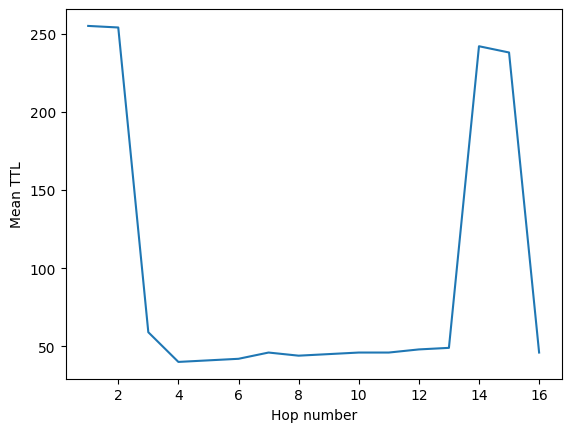

In [36]:
hop_num_vec = list(mean_ttl_vec.keys())
mean_ttl_vec_vals = [x / num_responses for x in mean_ttl_vec.values()]

plt.plot(hop_num_vec, mean_ttl_vec_vals)
plt.xlabel("Hop number")
plt.ylabel("Mean TTL")
plt.show()

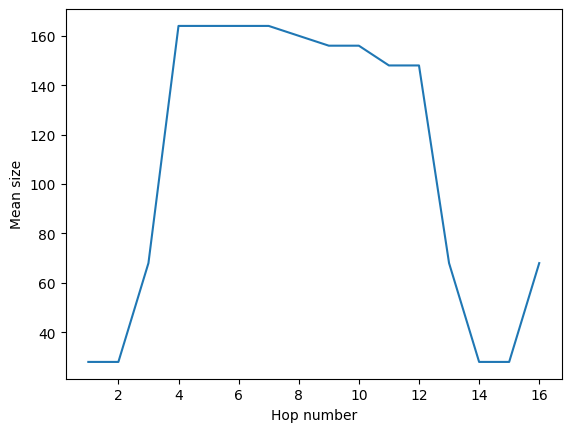

In [37]:
hop_num_vec = list(mean_size_vec.keys())
mean_size_vec_vals = [x / num_responses for x in mean_size_vec.values()]

plt.plot(hop_num_vec, mean_size_vec_vals)
plt.xlabel("Hop number")
plt.ylabel("Mean size")
plt.show()

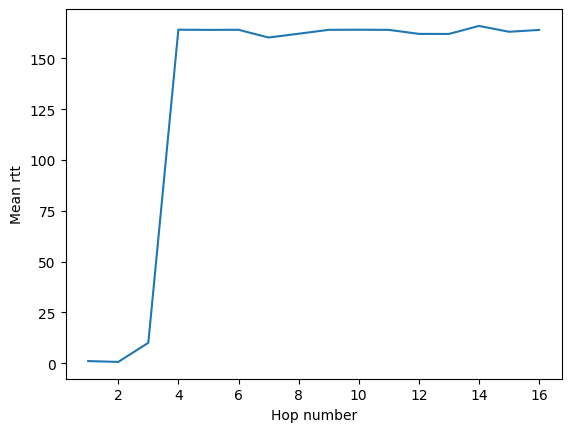

In [38]:
hop_num_vec = list(mean_rtt_vec.keys())
mean_rtt_vec_vals = [x / num_responses for x in mean_rtt_vec.values()]

plt.plot(hop_num_vec, mean_rtt_vec_vals)
plt.xlabel("Hop number")
plt.ylabel("Mean rtt")
plt.show()